In [4]:
from IPython.display import Image
from IPython.core.display import HTML

In [25]:
hashtable_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Hash_table_5_0_1_1_1_1_0_SP.svg/380px-Hash_table_5_0_1_1_1_1_0_SP.svg.png"
hash_simple = "./hash_simple.png"
orange = "./orange.png"
collision = "./collision.png"
chain_method_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Hash_table_5_0_1_1_1_1_0_LL.svg/500px-Hash_table_5_0_1_1_1_1_0_LL.svg.png"
linear_search_rl = "https://neerc.ifmo.ru/wiki/images/1/1c/Hashtables56.PNG"
quad_search_url = "./quadsearch.png"
habr_hash1_url = "https://habrastorage.org/r/w1560/files/608/1d4/f5c/6081d4f5c6a5432192e379b3f2b5cf5e.png"
habr_hash2_url = "https://habrastorage.org/r/w1560/files/b64/28f/61a/b6428f61a9e5444ebd4b177da29cacc3.png"

#### Определения

Словари и множества в Python реализованы с помощью хэш-таблиц.

$\textbf{$\textit{Хеш-таблица}$}$ — структура данных, которая представляет собой (как правило) разреженный ассоциативный массив.

In [6]:
Image(url=hashtable_url)

$\textbf{$\textit{Хеш-функция}$}$ — функция, осуществляющая преобразование массива входных данных произвольной длины в выходную битовую строку установленной длины, выполняемое определённым алгоритмом. Преобразование, производимое хеш-функцией, называется $\textbf{хешированием}$

При этом хеш функции можно разделить на 2 типа:  
1) $\textbf{Криптографические}$ - должны отвечать определенным требованиям безопасности;  
2) $\textbf{Не криптографические}$ - не строги, служат для других целей, например, для задачи MAC.

В Python >= 3.4 используется не криптографическая функция $\textit{SipHash}$, в Python <= 3.4 функция $\textit{Fowler–Noll–Vo}$ 

##### Криптография

1) Функция не обратная: невозможно получить из хеша исходное сообщение;  
2) При наличии некоторого сообщения $m_1$ должно быть трудно найти такое сообщение $m_2$, что
$\textit{hash($m_1$)} = \textit{hash($m_2$)}$  
3) При отсутствии всяких сообщений должно быть трудно найти такие сообщения $m_1$ и $m_2$, чтобы их хеши были равны.

##### SipHash

SipHash гарантирует, что, зная сообщение $m_1$ и его хеш SipHash($m_1$, $k$), и не зная ключ $k$, невозможно найти (любую информацию о) k или хеш SipHash($m_2$, $k$) для любого сообщения $m_2$ != $m_1$.  

Преимущества:  
1) Достаточно устойчива к коллизиям (эффективна для небольших наборов данных);  
2) Хорошо подходит для реализации хеш-таблиц за счет секретного ключа (низкая вероятность атак сообщений с одинаковым хешом).  

В Python:

In [7]:
hash(100)

100

In [8]:
hash(100.0)

100

In [9]:
hash(100.1)

230584300921356388

In [10]:
hash("a")

2197374306370396565

In [11]:
hash("b")

2306873152921886584

### Упрощенный принцип работы HashTable

1) Берется ключ и подается в хеш-функцию;  
2) После прохождения через функцию получаем битовую строку;  
3) Последние n бит определяют индекс в массиве, где будет храниться значение.

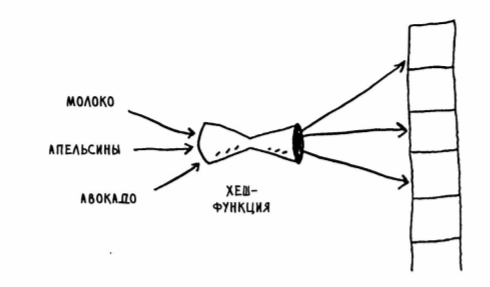

In [12]:
Image(hash_simple)

Например, мы хотим хранить следующее отображение: фрукт — цена. Пусть $\textit{hash("апельсины")}$ = 1003, а для определения индекса возьмем последний бит: 1003 % 10 = 3

In [13]:
1003 % 10

3

Тогда финальная запись будет выглядеть так:

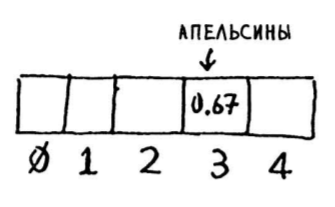

In [14]:
Image(orange)

#### Коллизии

Любая хеш-функция не идеальна! Существует бесконечное множество разных ключей, которые при прохождении через одну и ту же  
хеш-функцию дают одинаковый хеш: $\textit{hash($x_1$)}$ = $\textit{hash($x_2$)}$. В таком случае два разных ключа с разными значениями будут конкурировать за одну и ту же ячейку в массиве. Это явление называется $\textbf{коллизией}$.

Например, $\textit{hash("авокадо")}$ = $\textit{hash("апельсины")}$ = 0

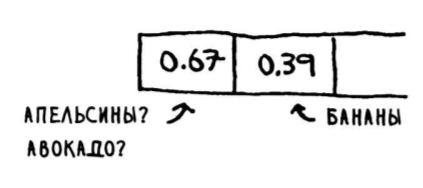

In [15]:
Image(collision)

### Методы разрешения коллизий

Существует несколько подходов к разрешению коллизий. Рассмотрим два из них:  
1) Цепочный метод;  
2) Метод открытой адресации.  

##### Цепочный метод

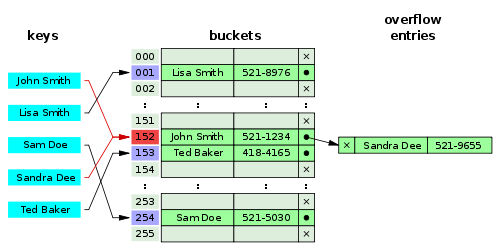

In [16]:
Image(chain_method_url)

Суть цепочного метода состоит в следующем: каждый бакет представляет из себя связный список. В случае возникновения коллизии в начальный узел добавляется ссылка на другой бакет.  
Тогда алгоритмическая сложность будет такая:  
1) Добавление: O(1);  
2) Удаление: O(1);  
3) Обновление: O(n) — в худшем, O(1) — в лучшем;  
4) Поиск: O(n) — в худшем, O(1) — в лучшем;

#### Метод открытой адресации

Все элементы хранятся непосредственно в хеш-таблице, без использования связных списков. Основные стратегии:  
1) Линейный поиск;  
2) Квадратичный поиск.  

##### Линейный поиск

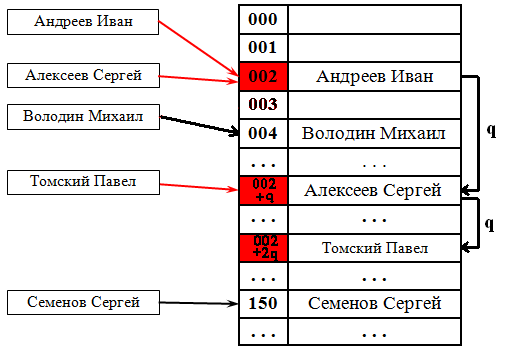

In [17]:
Image(linear_search_rl)

1) Выбирается шаг $q$;  
2) При возникновении коллизии последовательно просматриваем ячейки: $i+(q*q), i+(2*q), i+(n*q)$;  
3) При нахождении свободной ячейки записываем туда пару ключ-значение.

##### Квадратичный поиск

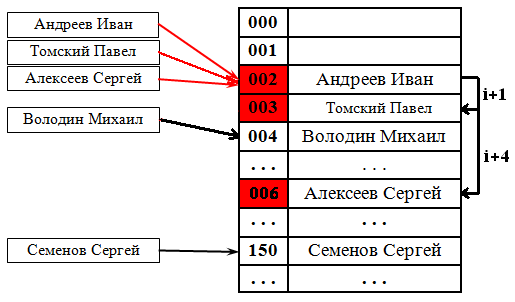

In [18]:
Image(quad_search_url)

Шаг не фиксирован, а изменяется квадратично. Поиск ведется до тех пор, пока не найдется свободная ячейка в таблице.

В отличие от хеширования с цепочками при использовании этого метода может возникнуть ситуация, когда хеш-таблица окажется полностью заполненной, следовательно, будет невозможно добавлять в неё новые элементы. В этом случае решением может быть динамическое увеличение размера хеш-таблицы с одновременной её перестройкой.

Для этого вводят специальный коэффициент заполнения $k$, превышение которого перестраивает всю хеш-таблицу. Как правило, этот коэффициент лежит в пределах 1/2 - 2/3. Если коэффициент будет превышен, создастся новый массив $arr2 = n*arr1$. Старые значения будут записаны в новый массив. Коэффициент $n$ зависит от реализации в каждом конкретном языке. В Python он зависит от количества элемементов. Сначала он равен 4, а затем уменьшается до 2.

### Реализация словарей в Python

Словари в Python написаны на C. Каждый бакет в массиве содержит 3 записи:  
1) Значение хеша;  
2) Значение ключа;  
3) Само значение;

```C
typedef struct {
  Py_ssize_t me_hash; // хеш
  PyObject *me_key; // ключ
  PyObject *me_value; // значение
} PyDictEntry; // объект бакета
```

Сама структура словаря выглядит так:

```C
#define PyDict_MINSIZE 8 // дефолтный размер словаря (количество элементов)

typedef struct _dictobject PyDictObject

struct _dictobject {
  PyObject_HEAD
  Py_ssize_t ma_fill; // число ненулевых ключей (сумма активных и пустых ячеек)
  Py_ssize_t ma_used; // активные ячейки - число ненулевых и не «пустых» ключей (me_key != NULL, me_key != dummy)
  Py_ssize_t ma_mask; // маска, равная PyDict_MINSIZE — 1
  PyDictEntry *ma_table; // хранится хеш-таблица, используется, когда элементов больше 8
  PyDictEntry *(*ma_lookup)(PyDictObject *mp, PyObject *key, long hash); // lookup - функция поиска
  PyDictEntry ma_smalltable[PyDict_MINSIZE]; // хранение таблицы с предвыделенной памятью PyDict_MINSIZE
};
```

###### Три состояния ячейки:  
1) Неиспользованная: ($\textit{me_key}$, $\textit{me_value}$ = ```null```) — не было записи в словарь;  
2) Активная: $\textit{me_key}$ != ``null`` and $\textit{me_key}$ != `dummy`, $\textit{me_value}$ != `null` — есть пара ключ/значение;  
3) Пустая: ($\textit{me_key}$ = `dummy`, $\textit{me_value}$ = ```null```) — запись была удалена.

##### Размер хеш-таблицы в Python

Хеш-таблица имеет размер $2^i$, где $i$ — это количество последних бит хеша для определения индекса.  
То есть для таблицы размером 8 нам необходимо брать $i$ = $log_2(8)$ = 3 последних бит хеша.

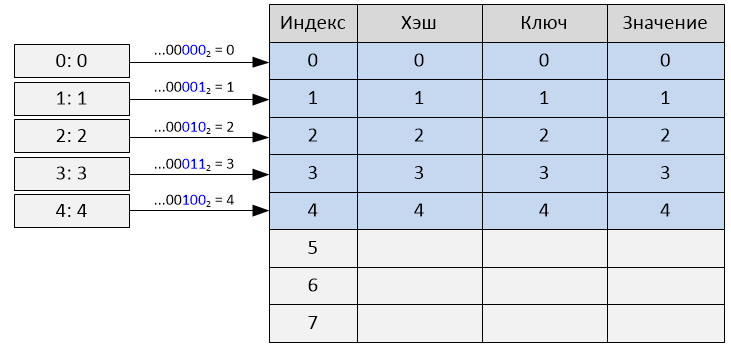

In [20]:
Image(habr_hash1_url)

Python использует маску для вычисления последних бит хеша:  
$index$ = $hash(value)$ & $mask$  

In [32]:
index = hash(15) & (8 - 1)
index

7

##### Разрешение коллизий

Взятие только i младших бит хеша в качестве индекса также уязвимо для коллизий:  
Рассмотрим следующий набор ключей:

```Python 
[i << 16 for i in range(20000)]
```

Хеш от целых чисел в Python – само целое число. Заданные ключи вписываются в словарь размера $2^{15}$ (так как 20000 < 32768).

In [24]:
list(map(lambda x: '{0:016b}'.format(x), [i << 16 for i in range(20000)]))

['0000000000000000',
 '10000000000000000',
 '100000000000000000',
 '110000000000000000',
 '1000000000000000000',
 '1010000000000000000',
 '1100000000000000000',
 '1110000000000000000',
 '10000000000000000000',
 '10010000000000000000',
 '10100000000000000000',
 '10110000000000000000',
 '11000000000000000000',
 '11010000000000000000',
 '11100000000000000000',
 '11110000000000000000',
 '100000000000000000000',
 '100010000000000000000',
 '100100000000000000000',
 '100110000000000000000',
 '101000000000000000000',
 '101010000000000000000',
 '101100000000000000000',
 '101110000000000000000',
 '110000000000000000000',
 '110010000000000000000',
 '110100000000000000000',
 '110110000000000000000',
 '111000000000000000000',
 '111010000000000000000',
 '111100000000000000000',
 '111110000000000000000',
 '1000000000000000000000',
 '1000010000000000000000',
 '1000100000000000000000',
 '1000110000000000000000',
 '1001000000000000000000',
 '1001010000000000000000',
 '1001100000000000000000',
 '10011100

Последние 15 бит являются нулями и будут конкурировать за свободную ячейку. Это плохой случай, но из-за этого не стоит менять подход к выбору индекса. В Python реализован достаточно мощный механизм разрешения коллизий:

```Python
j = (5 * j) + 1 + perturb
perturb >>= PERTURB_SHIFT

# затем j % 2**i используется как следующий индекс пробы
# где:
#   perturb = hash(key)
#   PERTURB_SHIFT = 5
```

Рассмотрим на примере:

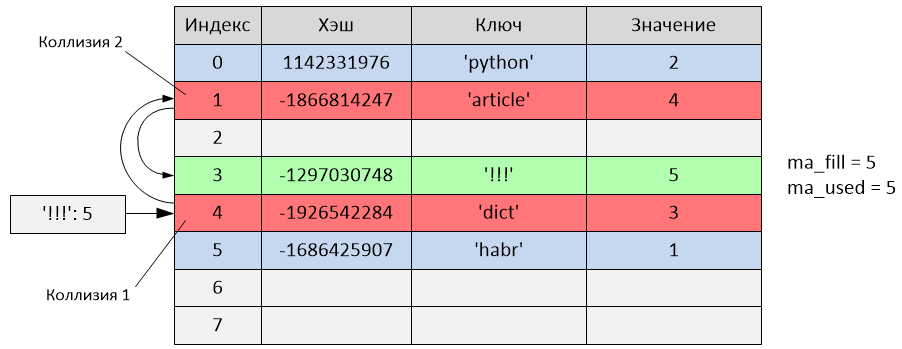

In [26]:
Image(habr_hash2_url)

При добавлении пары "!!!": 5 в словарь произошла коллизия:

```Python
hash('!!!') = -1297030748
i = -1297030748 & 7 = 4
```

Индекс 4 уже занят записью с ключом `dict`. То есть произошла коллизия. Начинается пробирование:
```Python
perturb = -1297030748
i = (4 * 5) + 1 + (-1297030748) = -1297030727
index = -1297030727 & 7 = 1
```

Новый индекс пробы равен 1, но данный индекс тоже занят (записью с ключом `article`). Произошла ещё одна коллизия, продолжаем пробирование:

```Python
perturb = perturb >> PERTURB_SHIFT
perturb = -1297030748 >> 5 = -40532211
i = (i * 5) + 1 + perturb
i = (-1297030727 * 5) + 1 + (-40532211) = -6525685845
index = -6525685845 & 7 = 3
```

Новый индекс пробы равен 3, и так как он не занят, происходит вставка записи с ключом '!!!' в ячейку с третьим индексом. В данном случае  из-за произошедших коллизий запись была добавлена после двух проб. Переменные ma_fill и ma_used стали равны 5.

#### Поиск элемента

```Python
    # псевдокод алгоритма
    def eq(key, entity):
        if id(key) == id(entity): return True
	if hash(key) != hash(entity): return False
	return key == entity
```

При поиске элемента происходит следующее:  
1) По алгоритму вычисляется индекс, если ячейка пуста — выбрасывается исключение, т.к. нет элемента в словаре;  
2) Если ячейка не пуста, то по функции выше проверяется, была ли коллизия. Сначала проверяются указатели, затем их хеши, а потом и равенство объектов;  
3) Если возвращается false, идет пробирование до тех пор, пока элемент не найдется, или не вызовется исключение.

##### Удаление элемента

Удаление из словаря происходит по ключу, но освобождения памяти не происходит. В этой функции вычисляется хеш-значение ключа, а затем происходит поиск записи в хеш-таблице. Если запись с таким ключом и хешем найдена, ключ этой записи выставляется в состояние «пустой» (то есть me_key = dummy), а значение записи – в NULL (me_value = NULL). После этого переменная ma_used уменьшится на единицу, а ma_fill останется без изменения. Если же запись не найдена, возвращается ошибка.

##### Структура словарей в Python >= 3.6

```Python
    d = {'timmy': 'red', 'barry': 'green', 'guido': 'blue'}
    
    indices =  [None, 1, None, None, None, 0, None, 2]
    entries =  [[-9092791511155847987, 'timmy', 'red'],
                [-8522787127447073495, 'barry', 'green'],
                [-6480567542315338377, 'guido', 'blue']]
```

Начиная с версии 3.6 структура словарей немного изменилась. Теперь используется два массива, один разреженный — для индексов, а другой хранит хеш, ключ и значение. Эта структура значительно экономит память при создании словаря и делает его упорядоченным по порядку добавления ключей. При добавлении элемента в словарь работают все принципы, описанные выше, но запись производится в массив индексов. Уже вычисляется не индекс в хеш-таблице, а положение индекса в массиве `indices`, сам индекс просто увеличивается на единицу. Соответственно, получение элемента происходит как в обычном массиве с заранее известным индексом.

### Полезные ссылки

https://habr.com/ru/post/247843/  
https://habr.com/ru/post/432996/  
https://neerc.ifmo.ru/wiki/index.php?title=Хеш-таблица  
https://neerc.ifmo.ru/wiki/index.php?title=Разрешение_коллизий  
https://vk.com/wall-54530371_184116  
https://ru.wikipedia.org/wiki/Хеш-функция  
https://ninegene.com/2021/08/08/non-cryptographic-hash-functions/ 
https://andrewbrookins.com/technology/pythons-default-hash-algorithm/  
https://ru.wikipedia.org/wiki/Имитовставка  
https://en.wikipedia.org/wiki/SipHash  
https://www.it-swarm.com.ru/ru/cryptography/v-chem-raznica-mezhdu-hesh-funkciei-i-kriptograficheskoi-hesh-funkciei/l958483887/  
https://ru.wikipedia.org/wiki/Безопасность_криптографических_хеш-функций  
